<div style='background-image: url("../share/Aerial_view_LLNL.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.8) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">Instaseis/Syngine Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Part 2: First Basic Exercise</div>
        </div>
    </div>
</div>

### **2017 CIG-LLNL Computational Seismology Workshop**

Seismo-Live: http://seismo-live.org

##### Authors:
* Martin van Driel ([@martinvandriel](https://github.com/martinvandriel))
* Lion Krischer ([@krischer](https://github.com/krischer))
---

<img style="width:50%" src="images/logo.png">

## First Basic Exercise

**Task:** Calculate three component synthetic seismograms for the stations and events in the **data/events** and **data/stations** subdirectories and save them on disc.

#### Notes

1. Receiver objects can also be created from StationXML, SEED, or STATIONS files as well as obpy inventories using `instaseis.Receiver.parse()`; see the [documentation](http://www.instaseis.net/source.html#receiver) for details.
2. Source objects can also be created from QuakeML, CMTSOLUTIONS, and in other ways using `instaseis.Source.parse()`; see the [documentation](http://www.instaseis.net/source.html#source) for details.
3. The `get_seismograms()` method has a couple of extra arguments:
  * `kind`: `displacement`, `velocity`, `acceleration`
  * `remove_source_shift`, `reconvolve_stf`, `dt`,
  
  ... see the [documentation](http://www.instaseis.net/instaseis.html#instaseis.base_instaseis_db.BaseInstaseisDB.get_seismograms) for details.
4. You can use the properties of the Receiver and Source objects to create usefull filenames.

-----

Basic lines to set up the notebook and some paths.

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import obspy
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 8)

Import Instaseis and open the database:

In [2]:
import instaseis
db = instaseis.open_db("syngine://prem_a_10s")

-----

### 1. Load Receivers

**reminder:** you can use ObsPy to load stations and plot a map:

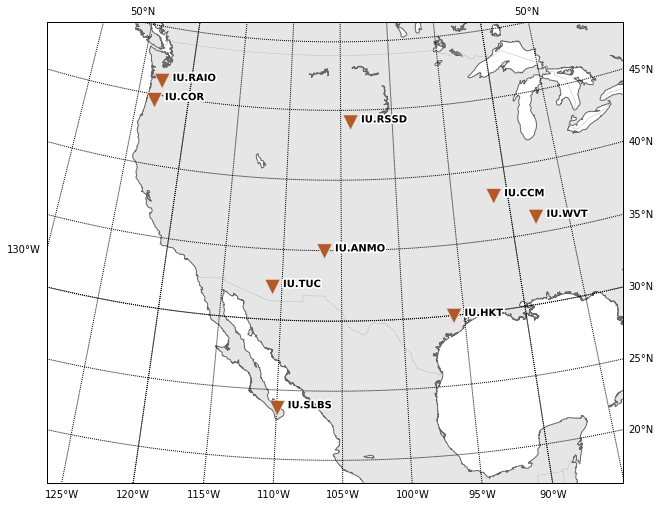

In [3]:
from obspy import read_inventory

inventory = read_inventory('data/stations/all_stations.xml')
inventory.plot(projection="local", resolution="i");

This inventory can directly be used as input to generate a list of `instaseis.Receiver` objects:

In [4]:
receivers = instaseis.Receiver.parse(inventory)
for rec in receivers[:2]:
    print(rec)

Instaseis Receiver:
	Longitude : -106.5 deg
	Latitude  :   34.8 deg
	Network   : IU
	Station   : ANMO
	Location  : 

Instaseis Receiver:
	Longitude : -106.5 deg
	Latitude  :   34.8 deg
	Network   : IU
	Station   : ANMO
	Location  : 



### 2. Load Events
**reminder:** use ObsPy to load events from a QuakeML file containing all events and plot a map:

1 Event(s) in Catalog:
2014-08-24T10:20:49.360000Z | +38.310, -122.380 | 6.07 mw
Instaseis Source:
	Origin Time      : 2014-08-24T10:20:49.360000Z
	Longitude        : -122.4 deg
	Latitude         :   38.1 deg
	Depth            : 1.2e+01 km km
	Moment Magnitude :   6.14
	Scalar Moment    :   1.61e+18 Nm
	Mrr              :  -4.76e+16 Nm
	Mtt              :  -1.09e+18 Nm
	Mpp              :   1.14e+18 Nm
	Mrt              :  -1.36e+17 Nm
	Mrp              :  -2.50e+17 Nm
	Mtp              :   1.12e+18 Nm



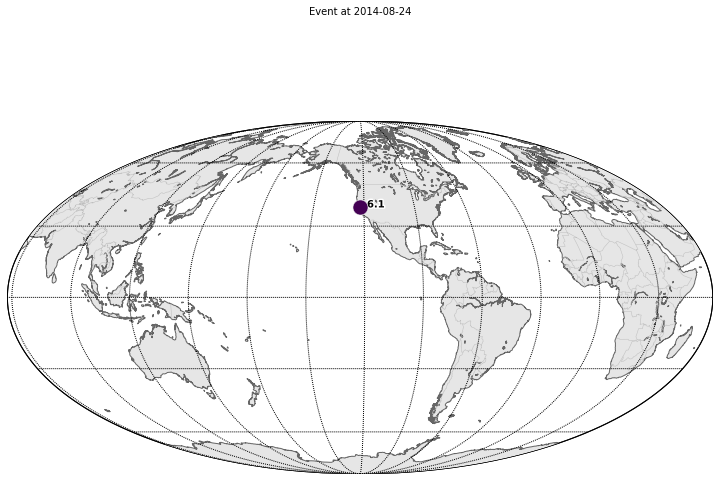

In [5]:
import glob # provides iterator to loop over files

cat = obspy.read_events('data/events/GCMT_2014_08_24__Mw_6_1.xml')
        
print(cat)
print(instaseis.Source.parse(cat.events[0]))
cat.plot();

### 3. Extract Seismograms and Save to File

In [6]:
dt = 1.0

for event in cat:
    src = instaseis.Source.parse(event)
    srcname = '%s_Mw_%3.1f' % (src.origin_time.date, src.moment_magnitude)
    for rec in receivers:
        # create a usefull filename
        recname = '%s_%s' % (rec.network, rec.station)
        filename = '%s_%s' % (recname, srcname)
        filename = filename.replace('.', '_')
        
        # extract seismograms using instaseis
        st = db.get_seismograms(source=src, receiver=rec, dt=dt)
        
        # write to miniseed files in the data_out folder. Write as MiniSEED due to multi
        # component support.
        filename = os.path.join('data_out', filename + '.mseed')
        st.write(filename, format='mseed')
        print("Written %s" % filename)

Written data_out/IU_ANMO_2014-08-24_Mw_6_1.mseed
Written data_out/IU_ANMO_2014-08-24_Mw_6_1.mseed
Written data_out/IU_CCM_2014-08-24_Mw_6_1.mseed
Written data_out/IU_COR_2014-08-24_Mw_6_1.mseed
Written data_out/IU_HKT_2014-08-24_Mw_6_1.mseed
Written data_out/IU_RAIO_2014-08-24_Mw_6_1.mseed
Written data_out/IU_RSSD_2014-08-24_Mw_6_1.mseed
Written data_out/IU_SLBS_2014-08-24_Mw_6_1.mseed
Written data_out/IU_TUC_2014-08-24_Mw_6_1.mseed
Written data_out/IU_WVT_2014-08-24_Mw_6_1.mseed


Check the data:

In [7]:
ls data_out/

IU_ANMO_2014-08-24_Mw_6_1.mseed  IU_RSSD_2014-08-24_Mw_6_1.mseed
IU_CCM_2014-08-24_Mw_6_1.mseed   IU_SLBS_2014-08-24_Mw_6_1.mseed
IU_COR_2014-08-24_Mw_6_1.mseed   IU_TUC_2014-08-24_Mw_6_1.mseed
IU_HKT_2014-08-24_Mw_6_1.mseed   IU_WVT_2014-08-24_Mw_6_1.mseed
IU_RAIO_2014-08-24_Mw_6_1.mseed  dummy
